<a href="https://colab.research.google.com/github/AbhishekKaushikCV/HCI/blob/main/P_7711.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Participant:7711
 
## Data Analysis
- Application_data
- Notification_data
- Device_data

### Application_data

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os

In [ ]:
from pathlib import Path

# Find all the folders
root_dir = Path('/content/gdrive/MyDrive/fd249093-60d2-4d4f-99d0-3e98954f7711')
folders = [fld for fld in root_dir.iterdir() if fld.is_dir()]

# Find all the file names
all_filenames = []
for fld in folders:
    for f in fld.glob('*application_data.txt'):
        all_filenames.append(f.name)

In [ ]:
folders

In [ ]:
all_filenames

In [ ]:
# Open and load the file  
for f in list(set(all_filenames)):
    app_data = pd.DataFrame({}) # An empty dataframe

    for fld in folders:
        if (fld / f).is_file():
           with open(fld /f, 'r') as fp:
            data =  json.load(fp)["application_data"] 
            temp_df = pd.DataFrame(data)
            app_data = app_data.append(temp_df,ignore_index=True)           

In [ ]:
app_data

,name,time,timeDate
0,com.huawei.android.launcher,453886603627243,09.08.2019 00:19:53.046
1,com.google.android.gm,453888156162139,09.08.2019 00:19:54.598
2,com.huawei.android.launcher,453933167223590,09.08.2019 00:20:39.609
3,ch.ethz.inf.vs.staals.visualattentionrecorder,453933673994423,09.08.2019 00:20:40.116
4,com.google.android.gm,453936877236089,09.08.2019 00:20:43.319
...,...,...,...
211,com.netflix.mediaclient,331709405178146,13.08.2019 22:37:17.329
212,com.huawei.android.launcher,332066424208820,13.08.2019 22:43:14.348
213,com.android.systemui,332066947053612,13.08.2019 22:43:14.871
214,com.huawei.android.launcher,332067457207778,13.08.2019 22:43:15.381


In [ ]:
# Sort the values by timeDate
app_data = app_data.sort_values(by=['timeDate'],ignore_index=True)

In [ ]:
app_data

,name,time,timeDate
0,com.huawei.android.launcher,453886603627243,09.08.2019 00:19:53.046
1,com.google.android.gm,453888156162139,09.08.2019 00:19:54.598
2,com.huawei.android.launcher,453933167223590,09.08.2019 00:20:39.609
3,ch.ethz.inf.vs.staals.visualattentionrecorder,453933673994423,09.08.2019 00:20:40.116
4,com.google.android.gm,453936877236089,09.08.2019 00:20:43.319
...,...,...,...
211,com.netflix.mediaclient,331709405178146,13.08.2019 22:37:17.329
212,com.huawei.android.launcher,332066424208820,13.08.2019 22:43:14.348
213,com.android.systemui,332066947053612,13.08.2019 22:43:14.871
214,com.huawei.android.launcher,332067457207778,13.08.2019 22:43:15.381


In [ ]:
# How many different apps?
print(app_data['name'].describe())

count                             216
unique                             18
top       com.huawei.android.launcher
freq                               96
Name: name, dtype: object


- 18 different apps were used by the participant during the data recording

In [ ]:
# Start and End time of the data recording
print("Start time Date:",app_data["timeDate"].min())
print("End time Date:",app_data["timeDate"].max())

Start time Date: 09.08.2019 00:19:53.046
End time Date: 13.08.2019 22:43:16.406


In [ ]:
# Exclude the android launcher, and attention recorder app

mask = app_data['name'].isin(['com.huawei.android.launcher', 'ch.ethz.inf.vs.staals.visualattentionrecorder'])
app_data = app_data[~mask]

In [ ]:
print(app_data['name'].describe())

count                        83
unique                       16
top       com.instagram.android
freq                         25
Name: name, dtype: object


In [ ]:
# Changed app names
app_names = app_data.name.unique() # Different app names used in the data
changed_names = ['google','desklock','apple music','books','instagram','facebook','netflix','systemui','whatsapp','systemmanager','chrome',
                 'huawei_hwouc','youtube','huawi_search','wahanda_marketplace','zuerimensa'] # New app names

app_data = app_data.replace(to_replace=app_names,value=changed_names) # Replace old names by new names
print(app_data)

            name             time                 timeDate
1         google  453888156162139  09.08.2019 00:19:54.598
4         google  453936877236089  09.08.2019 00:20:43.319
6       desklock  453963946712648  09.08.2019 00:21:10.389
12        google  482084973412031  09.08.2019 08:09:54.121
14   apple music  482102192831820  09.08.2019 08:10:11.341
..           ...              ...                      ...
203    instagram  305043131077703  13.08.2019 15:12:51.042
207     facebook  308764488396512  13.08.2019 16:14:52.253
210     systemui  331708359963042  13.08.2019 22:37:16.284
211      netflix  331709405178146  13.08.2019 22:37:17.329
213     systemui  332066947053612  13.08.2019 22:43:14.871

[83 rows x 3 columns]


instagram              25
whatsapp               15
systemui                9
facebook                6
google                  6
netflix                 5
wahanda_marketplace     4
huawi_search            4
chrome                  2
systemmanager           1
zuerimensa              1
desklock                1
apple music             1
huawei_hwouc            1
books                   1
youtube                 1
Name: name, dtype: int64


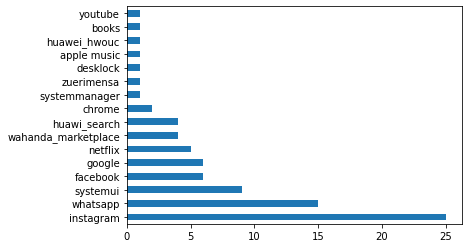

In [ ]:
# How many times an app is used?
app_by_name = app_data.name.value_counts()
print(app_by_name)
app_by_name.plot(kind='barh')

     - Instagram and whatsapp are the most used apps by the user
     - Least used apps are: books, youtube, music

In [ ]:
# Total usage of an app, for Example: Instagram usage

### Question: 
- What is the meaning of time in the dataset? 
- Can we use this to find total usage of the app?

In [ ]:
app_data.groupby(['name','time']).sum()

KeyError: ignored

In [ ]:
k.max()

time    5171828948187063
dtype: int64

In [ ]:
nanos = 37505999991577
secs = nanos / 1e9

In [ ]:
secs/3600

10.418333330993612

### Notification_data

In [6]:
from pathlib import Path

# Find all the folders
root_dir = Path('/content/gdrive/MyDrive/fd249093-60d2-4d4f-99d0-3e98954f7711')
folders = [fld for fld in root_dir.iterdir() if fld.is_dir()]

# Find all the file names
all_filenames = []
for fld in folders:
    for f in fld.glob('*notification_data.txt'):
        all_filenames.append(f.name)

In [7]:
all_filenames

['notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notification_data.txt',
 'notificati

In [11]:
# Open and load the file  
for f in list(set(all_filenames)):
    noti_data = pd.DataFrame({}) # An empty dataframe

    for fld in folders:
        if (fld / f).is_file():
           with open(fld /f, 'r') as fp:
            data =  json.load(fp)["notification_data"] 
            temp_df = pd.DataFrame(data)
            noti_data = noti_data.append(temp_df,ignore_index=True)           

In [17]:
# Sort the values by timeDate
noti_data = noti_data.sort_values(by=['timeDate'],ignore_index=True)

In [18]:
# Notification_data
noti_data

,event,package,category,tag,id,isOngoing,time,timeDate,timeSensor
0,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,1001,True,453837136395480,09.08.2019 00:19:03.578,1565302743491
1,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,ranker_group1,2147483647,False,453837137382980,09.08.2019 00:19:03.579,1565302743571
2,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,1002,True,453837136927251,09.08.2019 00:19:03.579,1565302743543
3,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,5475,False,453837348988709,09.08.2019 00:19:03.791,1565302743782
4,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,5475,False,453838074853292,09.08.2019 00:19:04.517,1565302744496
...,...,...,...,...,...,...,...,...,...
2099,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,1001,True,331705865280230,13.08.2019 22:37:13.789,1565728633777
2100,posted,com.huawei.systemmanager,None,None,1074741825,False,331738181584912,13.08.2019 22:37:46.106,1565728666089
2101,posted,com.huawei.systemmanager,None,None,1074741825,False,331922511581759,13.08.2019 22:40:50.436,1565728850412
2102,posted,com.huawei.systemmanager,None,None,1074241823,False,332028307559347,13.08.2019 22:42:36.232,1565728956213


In [19]:
noti_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event       2104 non-null   object
 1   package     2104 non-null   object
 2   category    23 non-null     object
 3   tag         48 non-null     object
 4   id          2104 non-null   int64 
 5   isOngoing   2104 non-null   bool  
 6   time        2104 non-null   int64 
 7   timeDate    2104 non-null   object
 8   timeSensor  2104 non-null   int64 
dtypes: bool(1), int64(3), object(5)
memory usage: 133.7+ KB


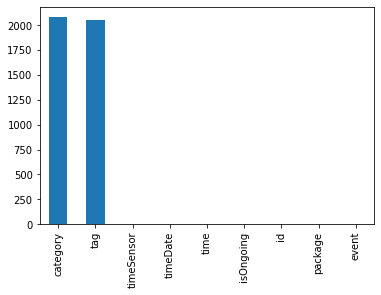

In [27]:
# Total null values in the notification data
noti_data.isna().sum().sort_values(ascending = False).plot(kind='bar')

     - There are too many null values in 'category' and 'tag' columns

In [33]:
# Category Values
category_names = noti_data.category.unique()
category_names

array([None, 'email', 'msg'], dtype=object)

In [35]:
# Tag values
tag_names = noti_data.tag.unique()
tag_names

array([None, 'ranker_group1', 'gig:-2138516909:^sq_ig_i_personal',
       'c3Rvcnk6MTE0MjIwNTg0MToxNTY1MzMxMzY1ODI4NjkwOjQ1MTc2MTcxMTUyNjY4Nw==',
       '41794788832-1546541104@g.us', '41794788832@s.whatsapp.net',
       'direct|184547055;thread_id:340282366841710300949128114516987833340',
       '41795488404-1561203818@g.us', '41795488404-1360854648@g.us',
       'c3Rvcnk6MTE0MjIwNTg0MToxNTY1NjAxMzI4MDI1MTE3OjQ1MTc2MTcxMTUyNjY4Nw==',
       '447515352863-1443182763@g.us',
       'direct|184547055;thread_id:3645421029678305852036639462'],
      dtype=object)

In [37]:
noti_data.package.describe()

count                                              2104
unique                                               12
top       ch.ethz.inf.vs.staals.visualattentionrecorder
freq                                               1939
Name: package, dtype: object

In [38]:
# Exclude the notification data from android launcher, and attention recorder app
mask = noti_data['package'].isin(['com.huawei.android.launcher', 'ch.ethz.inf.vs.staals.visualattentionrecorder'])
noti_data = noti_data[~mask]

In [39]:
noti_data

,event,package,category,tag,id,isOngoing,time,timeDate,timeSensor
13,removed,com.google.android.gm,email,gig:-2138516909:^sq_ig_i_personal,0,False,482091855790155,09.08.2019 08:10:01.004,1565329237752
14,removed,com.google.android.gm,email,gig:-2138516909:^sq_ig_i_personal,-448777350,False,482091858480259,09.08.2019 08:10:01.006,1565329237768
15,posted,com.facebook.katana,None,c3Rvcnk6MTE0MjIwNTg0MToxNTY1MzMxMzY1ODI4NjkwOj...,0,False,482456632043223,09.08.2019 08:16:06.074,1565331366045
16,removed,com.facebook.katana,None,c3Rvcnk6MTE0MjIwNTg0MToxNTY1MzMxMzY1ODI4NjkwOj...,0,False,482463885337493,09.08.2019 08:16:13.328,1565331366045
17,posted,com.huawei.systemmanager,None,None,1074241823,False,482640613415070,09.08.2019 08:19:10.056,1565331550025
...,...,...,...,...,...,...,...,...,...
2071,removed,com.huawei.contacts.sync,None,None,10000,True,308769787553282,13.08.2019 16:14:57.552,1565705697374
2100,posted,com.huawei.systemmanager,None,None,1074741825,False,331738181584912,13.08.2019 22:37:46.106,1565728666089
2101,posted,com.huawei.systemmanager,None,None,1074741825,False,331922511581759,13.08.2019 22:40:50.436,1565728850412
2102,posted,com.huawei.systemmanager,None,None,1074241823,False,332028307559347,13.08.2019 22:42:36.232,1565728956213


In [41]:
# Information about package column
noti_data.package.describe()

count              165
unique              11
top       com.whatsapp
freq                64
Name: package, dtype: object

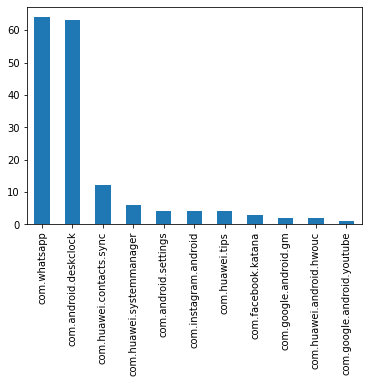

In [48]:
noti_data.package.value_counts().plot(kind = 'bar')

     - There are 11 unique package's notification 
     - In which 'Whatsapp' is the highest one
     - Deskclock is the second highest

In [49]:
# Information about event column
noti_data.event.describe()

count        165
unique         2
top       posted
freq         135
Name: event, dtype: object

In [50]:
# Information about category column
noti_data.category.describe()

count      23
unique      2
top       msg
freq       21
Name: category, dtype: object

In [51]:
noti_data.category.unique()

array(['email', None, 'msg'], dtype=object)

In [53]:
noti_data.category.value_counts()

msg      21
email     2
Name: category, dtype: int64

### Device_data

In [56]:
from pathlib import Path

# Find all the folders
root_dir = Path('/content/gdrive/MyDrive/fd249093-60d2-4d4f-99d0-3e98954f7711')
folders = [fld for fld in root_dir.iterdir() if fld.is_dir()]

# Find all the file names
all_filenames = []
for fld in folders:
    for f in fld.glob('*device_data.txt'):
        all_filenames.append(f.name)

In [58]:
len(all_filenames)

42

In [59]:
# Open and load the file  
for f in list(set(all_filenames)):
    device_data = pd.DataFrame({}) # An empty dataframe

    for fld in folders:
        if (fld / f).is_file():
           with open(fld /f, 'r') as fp:
            data =  json.load(fp)["device_data"] 
            temp_df = pd.DataFrame(data)
            device_data = device_data.append(temp_df,ignore_index=True)           

In [60]:
# Sort the values by timeDate
device_data = device_data.sort_values(by=['timeDate'],ignore_index=True)

In [61]:
device_data

,event,val,time,timeDate
0,ACTION_SCREEN_UNLOCKED,None,453837010685063,09.08.2019 00:19:03.453
1,ACTION_SCREEN_ON,None,453837011098605,09.08.2019 00:19:03.453
2,ACTION_USER_PRESENT,None,453837010982980,09.08.2019 00:19:03.453
3,ACTION_BATTERY_CHANGE,51,453837043091834,09.08.2019 00:19:03.485
4,BATTERY_STATUS_CHARGING,AC,453837043432980,09.08.2019 00:19:03.485
...,...,...,...,...
1977,ACTION_BRIGHTNESS_CHANGE,13,332024406521848,13.08.2019 22:42:32.331
1978,ACTION_BRIGHTNESS_CHANGE,12,332040695009866,13.08.2019 22:42:48.619
1979,ACTION_BRIGHTNESS_CHANGE,11,332043335108824,13.08.2019 22:42:51.259
1980,ACTION_BRIGHTNESS_CHANGE,10,332046471066115,13.08.2019 22:42:54.395


In [62]:
device_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   event     1982 non-null   object
 1   val       1779 non-null   object
 2   time      1982 non-null   int64 
 3   timeDate  1982 non-null   object
dtypes: int64(1), object(3)
memory usage: 62.1+ KB


In [64]:
# Total null values in the device data
device_data.isna().sum().sort_values(ascending = False)

val         203
timeDate      0
time          0
event         0
dtype: int64

In [66]:
# Column 'val'
device_data.val.describe()

count         1779
unique         245
top       PORTRAIT
freq            49
Name: val, dtype: object

     - Portrait has the highest frequency in val column

In [67]:
# Different values in val column
device_data.val.unique()

array([None, '51', 'AC', '9', 'AUTOMATIC', 'PORTRAIT',
       '{"current":"9","max":15}', '{"current":"0","max":15}',
       'MODE_NORMAL', 'RINGER_MODE_VIBRATE', 'WIFI_CONNECT', '52', '100',
       '204', 'MOBILE_CONNECT', '203', '202', '200', '199', '198', '196',
       '195', '193', '190', '186', '181', '177', '173',
       '{"current":"7","max":15}', '169', '{"current":"6","max":15}',
       '172', '{"current":"5","max":15}', '178', '185', '191', '189',
       '187', '184', '182', '180', '175', '171', '167', '165', '99', '87',
       '63', '80', '68', '72', '77', '79', '78', '76', '75', '74', '71',
       '69', '67', '65', '64', '62', '61', '59', '98', '60', '73',
       '{"current":"4","max":15}', '97', '95', 'LANDSCAPE', '174', '168',
       '161', '154', '148', '143', '137', '131', '126', '121', '116',
       '112', '107', '104', '136', '159', '166', '163', '160', '157',
       '155', '152', '149', '147', '144', '142', '139', '145', '183',
       '179', '176', '94', '164', '156'

In [69]:
# Column 'event'
device_data.event.describe()

count                         1982
unique                          21
top       ACTION_BRIGHTNESS_CHANGE
freq                          1250
Name: event, dtype: object

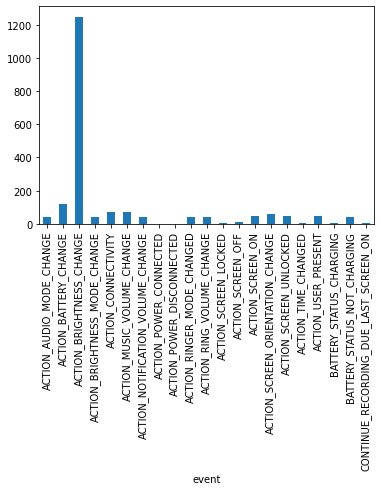

In [79]:
device_data.groupby('event').event.count().plot(kind = 'bar')

     - Brightness change has the highest frequency in the event column

In [70]:
# Name of the events
device_data.event.unique()

array(['ACTION_SCREEN_UNLOCKED', 'ACTION_SCREEN_ON',
       'ACTION_USER_PRESENT', 'ACTION_BATTERY_CHANGE',
       'BATTERY_STATUS_CHARGING', 'ACTION_BRIGHTNESS_CHANGE',
       'ACTION_BRIGHTNESS_MODE_CHANGE',
       'ACTION_SCREEN_ORIENTATION_CHANGE', 'ACTION_RING_VOLUME_CHANGE',
       'ACTION_MUSIC_VOLUME_CHANGE', 'ACTION_NOTIFICATION_VOLUME_CHANGE',
       'ACTION_AUDIO_MODE_CHANGE', 'ACTION_RINGER_MODE_CHANGED',
       'ACTION_CONNECTIVITY', 'BATTERY_STATUS_NOT_CHARGING',
       'ACTION_TIME_CHANGED', 'ACTION_SCREEN_LOCKED', 'ACTION_SCREEN_OFF',
       'CONTINUE_RECORDING_DUE_LAST_SCREEN_ON', 'ACTION_POWER_CONNECTED',
       'ACTION_POWER_DISCONNECTED'], dtype=object)

In [78]:
device_data.groupby(['event','val','time','timeDate']).count()

Empty DataFrame
Columns: []
Index: [(ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 18405456404664, 10.08.2019 07:35:13.742), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 24956631685922, 10.08.2019 09:24:24.917), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 25245887675461, 10.08.2019 09:29:14.173), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 29458777693701, 10.08.2019 10:39:27.063), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 29503634104631, 10.08.2019 10:40:11.920), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 30065691373816, 10.08.2019 10:49:33.977), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 31320737738005, 10.08.2019 11:10:29.023), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 37503887811369, 10.08.2019 12:53:30.809), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 45093313049867, 10.08.2019 14:59:59.524), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 57347348532648, 10.08.2019 18:24:15.273), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 57419876669616, 10.08.2019 18:25:27.801), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 112683043218557, 11.08.2019 09:46:30.626), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 141437271130522, 11.08.2019 17:45:45.345), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 141597116295081, 11.08.2019 17:48:25.302), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 141749753190370, 11.08.2019 17:50:57.939), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 142218830248225, 11.08.2019 17:58:47.016), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 142919017432082, 11.08.2019 18:10:27.204), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 143008127709160, 11.08.2019 18:11:54.855), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 145290421575820, 11.08.2019 18:49:56.493), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 145732520285648, 11.08.2019 18:57:18.591), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 146251262790399, 11.08.2019 19:05:57.334), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 207909293545111, 12.08.2019 12:13:46.381), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 208082353576902, 12.08.2019 12:16:39.441), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 209227970555022, 12.08.2019 12:35:45.058), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 210627366811268, 12.08.2019 12:59:04.454), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 212442087959186, 12.08.2019 13:29:20.063), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 220451405351868, 12.08.2019 15:42:52.746), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 290510060018399, 13.08.2019 11:10:35.339), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 291290392512721, 13.08.2019 11:23:35.672), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 305041607525620, 13.08.2019 15:12:49.519), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 308761305550158, 13.08.2019 16:14:49.070), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 330970340252738, 13.08.2019 22:24:58.264), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 331705825342209, 13.08.2019 22:37:13.749), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 453837047856938, 09.08.2019 00:19:03.490), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 482078639983386, 09.08.2019 08:09:47.788), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 483744775681150, 09.08.2019 08:37:33.193), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 483982435927468, 09.08.2019 08:41:30.853), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 484362815034702, 09.08.2019 08:47:51.232), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 484635927444035, 09.08.2019 08:52:24.345), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 485957129656471, 09.08.2019 09:14:26.340), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 498106419565303, 09.08.2019 12:36:56.055), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 499130911238132, 09.08.2019 12:54:00.547), (ACTION_BATTERY_CHANGE, 100, 18405404315602, 10.08.2019 07:35:13.690), (ACTION_BATTERY_CHANGE, 100, 24956623172901, 10.08.2019 09:24:24.909), (ACTION_BATTERY_CHANGE, 100, 25245878811398, 10.08.2019 09:29:14.165), (ACTION_BATTERY_CHANGE, 100, 482078619003178, 09.08.2019 08:09:47.767), (ACTION_BATTERY_CHANGE, 16, 331922472131759, 13.08.2019 22:40:50.396), (ACTION_BATTERY_CHANGE, 17, 331738569391162, 13.08.2019 22:37:46.494), (ACTION_BATTERY_CHANGE, 18, 331705816243771, 13.08.2019 22:37:

In [80]:
# Exclude the 'ACTION_BRIGHTNESS_CHANGE'
mask = device_data['event'].isin(['ACTION_BRIGHTNESS_CHANGE'])
device_data = device_data[~mask]

In [81]:
device_data

,event,val,time,timeDate
0,ACTION_SCREEN_UNLOCKED,None,453837010685063,09.08.2019 00:19:03.453
1,ACTION_SCREEN_ON,None,453837011098605,09.08.2019 00:19:03.453
2,ACTION_USER_PRESENT,None,453837010982980,09.08.2019 00:19:03.453
3,ACTION_BATTERY_CHANGE,51,453837043091834,09.08.2019 00:19:03.485
4,BATTERY_STATUS_CHARGING,AC,453837043432980,09.08.2019 00:19:03.485
...,...,...,...,...
1926,ACTION_AUDIO_MODE_CHANGE,MODE_NORMAL,331705825342209,13.08.2019 22:37:13.749
1927,ACTION_SCREEN_ORIENTATION_CHANGE,LANDSCAPE,331709490157312,13.08.2019 22:37:17.414
1928,ACTION_BATTERY_CHANGE,17,331738569391162,13.08.2019 22:37:46.494
1929,ACTION_BATTERY_CHANGE,16,331922472131759,13.08.2019 22:40:50.396


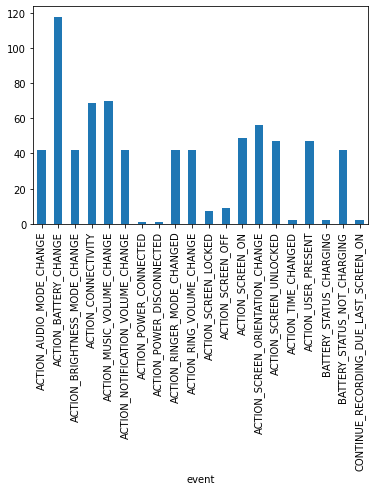

In [82]:
device_data.groupby('event').event.count().plot(kind = 'bar')